In [3]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [4]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.8e20]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e18]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[1.0]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandX3,bandX3,bandX3],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [5]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 21.169545 seconds (118.59 M allocations: 17.519 GiB, 10.49% gc time)


3.0

In [6]:
foreach(x->println(x," ", kees[x,1,1]),1:length(sigmaes[:,:,1]))

1 0.9368219031663839
2 0.9426365900549507
3 0.94787557646532
4 0.9527318010590534
5 0.9566925262593637
6 0.9602539741980014
7 0.9634664814662566
8 0.9666884094041039
9 0.9688799176671498
10 0.9709629127956317
11 0.9729512030157574
12 0.9748253396415708
13 0.9766180794373543
14 0.9785837976396433
15 0.9801045078711343
16 0.9820725811681374
17 0.9841629286016256
18 0.9865135525104356
19 0.989193753255055
20 0.992550579999181
21 0.9963201759995342
22 1.000463549736446
23 1.0050768644466084
24 1.010498999200858
25 1.0170029454103897
26 1.0240167695317632
27 1.0317520252096586
28 1.0402597847549429
29 1.0501753306368804
30 1.0606908089089662
31 1.0719001202565457
32 1.0836265024763403
33 1.096580034673472
34 1.1106418967689868
35 1.1252121591335271
36 1.1404710114055108
37 1.156433816341964
38 1.1738371289560465
39 1.1915635810050824
40 1.2098078364585652
41 1.2286179091550355
42 1.2483938169376012
43 1.268846077871875
44 1.2893050165713502
45 1.3102248780548513
46 1.3316630501145963
47 1.3

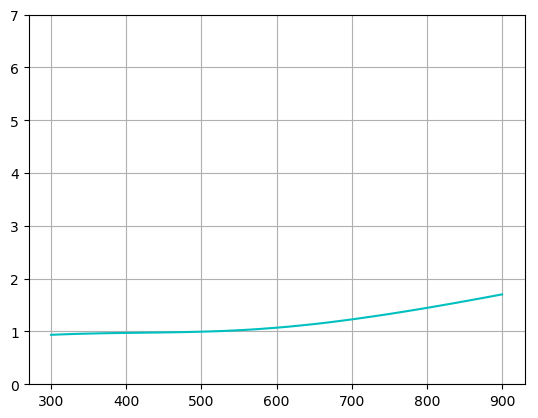

In [7]:
plot(Ts,kees[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [8]:
foreach(x->println(x," ", kbis[x,1,1]),1:length(sigmaes[:,:,1]))

1 0.0016450121451139928
2 0.0025748775376925265
3 0.003955861997592508
4 0.005801214279978501
5 0.008413113862778685
6 0.011989734625866083
7 0.01678876094519618
8 0.02311569074138995
9 0.031245774390775093
10 0.04148629507110702
11 0.05455764960605816
12 0.07092416338256247
13 0.09114728137857597
14 0.1165341514275146
15 0.14486588093002561
16 0.17993283357975773
17 0.22166886050946333
18 0.2707610313756167
19 0.3279337807184376
20 0.393122392432222
21 0.46685634310913876
22 0.5512331703119961
23 0.6463728095903658
24 0.7527435685311499
25 0.8709524278838899
26 0.997025822458619
27 1.135767757342974
28 1.2864633172432058
29 1.449543265669122
30 1.6232879592985046
31 1.8050443912159435
32 1.9948488127394821
33 2.195809045396104
34 2.406145905880717
35 2.6234565681017004
36 2.8472983927750892
37 3.0734447302374006
38 3.308464826245801
39 3.5471593677364672
40 3.789141646020938
41 4.033896483462189
42 4.282354128849327
43 4.533486770362517
44 4.784604319587237
45 5.035951012316775
46 5.2

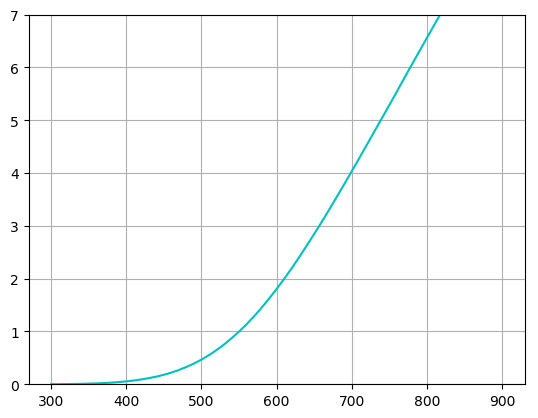

In [9]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
ylim(0,7)
grid()

In [10]:
foreach(x->println(x," ", seebecks[x,1,1], "   es ",seebeckes[x,1,1],"   hs ",seebeckhs[x,1,1]),1:length(sigmaes[:,:,1]))

1 -0.0001041184192018478   es -0.0001041538888777745   hs 0.001006122292463237
2 -0.00010718172732184419   es -0.00010723850165867969   hs 0.0009696508678042186
3 -0.00011021154367732434   es -0.00011030084447536946   hs 0.0009338488795492081
4 -0.0001132068648782715   es -0.00011334022330120075   hs 0.0009052915112708345
5 -0.00011615817464811403   es -0.00011635566195105444   hs 0.0008753397172132694
6 -0.00011905861135174033   es -0.00011934610029702706   hs 0.0008463979318662488
7 -0.00012189738466805795   es -0.00012230846761111228   hs 0.000818938671767518
8 -0.00012466588013068409   es -0.00012524359424015983   hs 0.000793021302195616
9 -0.00012735332547405493   es -0.00012814928282235517   hs 0.0007693249933854825
10 -0.00012994765257036048   es -0.00013102350405824411   hs 0.000747548932576999
11 -0.00013241855952405307   es -0.00013386050197660785   hs 0.0007254321565650514
12 -0.0001347504811130915   es -0.0001366606830258965   hs 0.0007040640198884362
13 -0.0001369216660279

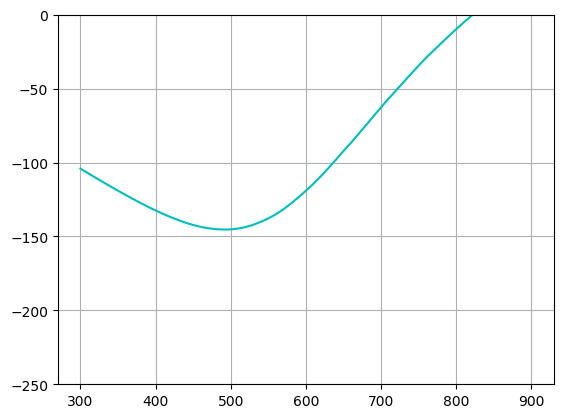

In [11]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
ylim(-250,-0)
grid()

In [12]:
foreach(x->println(x," ", sigmas[x,1,1], "   es ",sigmaes[x,1,1],"   hs ",sigmahs[x,1,1]),1:length(sigmaes[:,:,1]))

1 139243.03633338396   es 139238.58797588805   hs 4.448357495905094
2 135860.94210618714   es 135853.77942531326   hs 7.162680873869014
3 132589.81993084264   es 132578.48020009327   hs 11.339730749383552
4 129426.78865775077   es 129409.8442097875   hs 16.94444796327497
5 126370.84100503742   es 126345.67537748208   hs 25.16562755533593
6 123420.59807573182   es 123383.85743184923   hs 36.740643882592295
7 120579.2933858504   es 120526.63124354716   hs 52.66214230323242
8 117841.29629296846   es 117767.15801346806   hs 74.13827950039939
9 115207.62681306653   es 115105.4507846576   hs 102.17602840892172
10 112678.81863690697   es 112540.83835249496   hs 137.9802844120095
11 110264.5767081637   es 110079.54641308551   hs 185.03029507818752
12 107960.56768571901   es 107715.27159511301   hs 245.29609060599765
13 105767.7080939375   es 105446.38901516888   hs 321.3190787686237
14 103694.86753981489   es 103274.2631496376   hs 420.60439017729743
15 101726.55873239534   es 101199.670283246

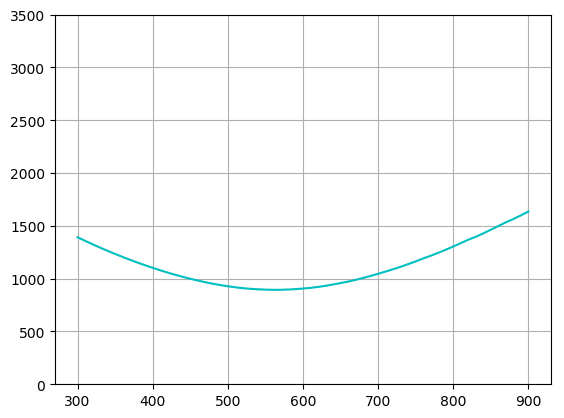

In [13]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
ylim(0,3500)
grid()

In [14]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [15]:
foreach(x->println(x," EX3 ", Efsr[x,1,1]," EX1 ", Efsr[x,1,1]-Ec0(0.6)),1:length(Efsr[:,:,1]))

1 EX3 -0.0699276045041648 EX1 -0.13092760450416482
2 EX3 -0.0708222979012012 EX1 -0.13182229790120123
3 EX3 -0.07173743160383328 EX1 -0.1327374316038333
4 EX3 -0.07267258472584093 EX1 -0.13367258472584095
5 EX3 -0.07362725097874367 EX1 -0.1346272509787437
6 EX3 -0.0746007807802922 EX1 -0.13560078078029222
7 EX3 -0.07559232568469554 EX1 -0.13659232568469556
8 EX3 -0.07660079171115974 EX1 -0.13760079171115977
9 EX3 -0.07762480226689306 EX1 -0.13862480226689308
10 EX3 -0.07866266907444164 EX1 -0.13966266907444166
11 EX3 -0.07971236934839965 EX1 -0.14071236934839967
12 EX3 -0.08077152824525147 EX1 -0.1417715282452515
13 EX3 -0.0818374066133778 EX1 -0.14283740661337782
14 EX3 -0.08290689494023162 EX1 -0.14390689494023165
15 EX3 -0.08397651499032222 EX1 -0.14497651499032224
16 EX3 -0.08504243091692576 EX1 -0.1460424309169258
17 EX3 -0.08610047161788792 EX1 -0.14710047161788795
18 EX3 -0.08714616580709666 EX1 -0.1481461658070967
19 EX3 -0.08817479070763934 EX1 -0.14917479070763937
20 EX3 -0.0

In [33]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############

function klpar(con::Float64,p::Float64,NP::Float64)
    thetaL=52.3e12*hbar/kB # K 
    thetaT=29.7e12*hbar/kB  # K
    vL=(1-con)*7700+con*4900    # m/s
    vT=(1-con)*4900+con*3000    # m/s
    gammaL=2.5*(1-con)+1.7*con
    gammaT=2.5*(1-con)+1.7*con
    M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
    V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
    a=V^(1.0/3.0)
    ro=M/V
    Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
    jL=vL/7700*Vdj
    jT=vT/4900*Vdj
    thetaLx=thetaL*jL
    thetaTx=thetaT*jT
    ##########Boundary Scattering###############3
    D=11e-9
    #p=1.0
    ##########Alloy Scattering###################
    mbar=(28.0855*(1-con)+118.71*con)
    GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
    GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
    ##########Electron Scattering###################
    Eep=5.0*q
    xsp=xs[1]
    Tp=300.0
    mdx1=0.67*me
    mdx3=0.38*me
    Efx3=0.2589
    Efx1=0.2589
    ##########Nanoparticle Scattering###################
    #NP=0
    #alpha=1.0
    Rnp=1/2*15.0e-9#
    Vnp=4/3*pi*(Rnp)^3
    rhonp=NP/100/Vnp
    rhoM=3.0
    rhoT=3.78
    alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);

#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
    Tsindex=1#25
    numberofnindex=1
    xsindex=1
    vartauPH0x=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
        thetaLx, thetaTx, thetaTx, M,   M, #10
        V, a, T_EF_Dict_Array, Eep, alphaNP, #15
        Rnp, thetaLx, thetaTx, vL, vT, #20
        vL, vT, p, NP,Tsindex,#25
        numberofnindex,xsindex,p,D,GammaMgSiSn,#30
        mdx1,mdx3,Efx1,Efx3,ro,#35,
        NP,alphaNP,Rnp,Vnp,rhonp #40
        ]
    return vartauPH0x
end
vartauPH0=klpar(1.0,1.0,0.0)
thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
#println("2")
tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22])                  


tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

tauPHeLfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
tauPHeTfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[21])
tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
    ,var[1],var[2],var[22])

tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
#println("3")

tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf


tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
#

tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
#println("4")

tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
xmax=1.0

1.0

In [34]:
klA=thermalPropsiso(Ts,tauPHL,tauPHTx,tauPHTy,[vartauPH0[21],vartauPH0[2],vartauPH0[22]])

61×1×1 Array{Float64,3}:
[:, :, 1] =
 17.97056232142099  
 17.267367240983038 
 16.616464334883155 
 16.012302418635546 
 15.450079800248245 
 14.925623268940576 
 14.435289574330811 
 13.975884707009511 
 13.544597367265292 
 13.138943817176958 
 12.756721923355817 
 12.395972664407056 
 12.054947735713496 
  ⋮                 
  5.960554596332332 
  5.879765750153815 
  5.801102110013459 
  5.724479602056218 
  5.649818508329701 
  5.577043189855915 
  5.506081830578509 
  5.436866200371562 
  5.36933143547359  
  5.3034158348686615
  5.239060671277959 
  5.176210015551519 

In [36]:
kls=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)
    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[2],vartauPH0[22]])
    println("T=", iTx, " kl= " ,round(kls[iT,1,1]*10000)/10000)
    println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,
    " kTx/3=",kTx," kTy/3=",kTy)
end

T=300.0 kl= 11.0155
IL1= 2.580315895688849e-13 IL2= 0.15411779594319835 IL3= 1.1906787144196327e10 ITx1= 1.2802214872259616e-14 ITx2= 0.026641846075361842 ITx3= 3.4000108341324296e9 kL/3=6.494710219275387 kTx/3=3.477530940044122 kTy/3=1.0432592820132365
T=310.0 kl= 17.2674
IL1= 2.1301009813001045e-13 IL2= 0.1404811799996377 IL3= 1.131635535599069e10 ITx1= 1.0540588604681547e-14 ITx2= 0.02420759129368784 ITx3= 3.207757822931818e9 kL/3=6.224725408209893 kTx/3=10.03876530252104 kTy/3=1.003876530252104
T=320.0 kl= 16.3044
IL1= 1.7687823404120394e-13 IL2= 0.12839139053603296 IL3= 1.0766387559437885e10 ITx1= 8.73118996893265e-15 ITx2= 0.022059716541832978 ITx3= 3.0310965024361405e9 kL/3=5.97568475061965 kTx/3=9.361389663574931 kTy/3=0.9673435985694095
T=330.0 kl= 15.4289
IL1= 1.4768799560106757e-13 IL2= 0.11763707360802142 IL3= 1.0253542841886564e10 ITx1= 7.27365855170464e-15 ITx2= 0.020157490745966445 ITx3= 2.8684148507079077e9 kL/3=5.745298912860821 kTx/3=8.750287078785277 kTy/3=0.93336395

T=630.0 kl= 5.2908
IL1= 3.2224932400446778e-15 IL2= 0.017944782147008384 IL3= 3.365462334967435e9 ITx1= 1.539584694709813e-16 ITx2= 0.002972045270181602 ITx3= 8.613263563456805e8 kL/3=2.640559851960228 kTx/3=2.196330200538448 kTy/3=0.45390824144461256
T=640.0 kl= 5.1647
IL1= 2.934006392112973e-15 IL2= 0.017129688958514036 IL3= 3.2703388555910034e9 ITx1= 1.401192674996762e-16 ITx2= 0.0028357884222598565 ITx3= 8.358292086976792e8 kL/3=2.5934478131731824 kTx/3=2.1250140754667615 kTy/3=0.44625295584801994
T=650.0 kl= 5.0439
IL1= 2.6751763338094757e-15 IL2= 0.016363060669747898 IL3= 3.179158592344324e9 ITx1= 1.2770924360742382e-16 ITx2= 0.0027077232433215877 ITx3= 8.11445890918177e8 kL/3=2.547970106595425 kTx/3=2.0571104221625407 kTy/3=0.43885022339467533
T=660.0 kl= 4.9281
IL1= 2.442572644008019e-15 IL2= 0.015641358968745085 IL3= 3.0917096082400656e9 ITx1= 1.1656225637281196e-16 ITx2= 0.0025872440927909306 ITx3= 7.881128304304937e8 kL/3=2.50404303156306 kTx/3=1.992404592666258 kTy/3=0.4316

In [19]:
MgSn_KL_T=[303.381209787804   ,404.509621648526   ,508.944674606021   ,609.64854815216    ,715.169193157614]
MgSn_KL_K=[ 7.16256157635468, 5.26108374384236, 4.14778325123153, 3.38916256157635, 2.89655172413793]

5-element Array{Float64,1}:
 7.16256157635468
 5.26108374384236
 4.14778325123153
 3.38916256157635
 2.89655172413793

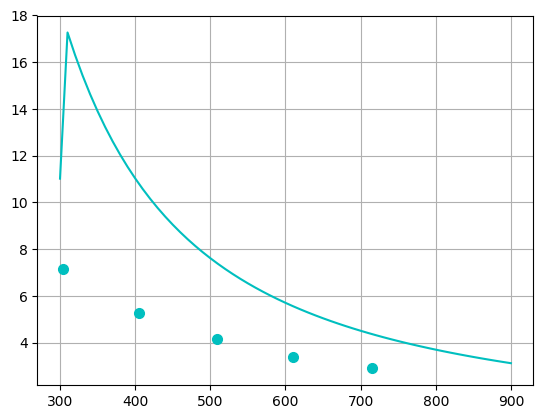

In [37]:
figure()
plot(Ts,kls[:,1,1],linestyle="-",color="c")
plot(MgSn_KL_T,MgSn_KL_K,linestyle="None",marker="o",markersize=7,color="c")
#ylim(0,10)

grid()

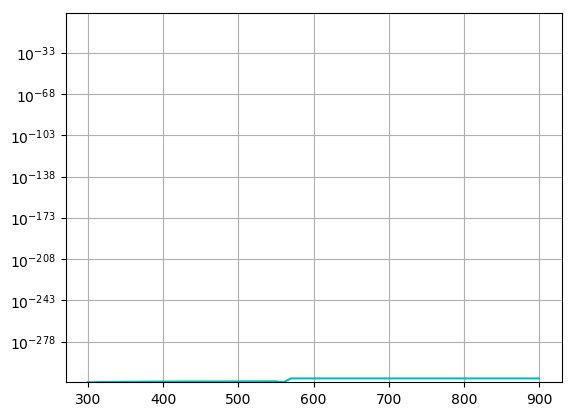

In [21]:
semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
ylim(0,10)

grid(true,which="both")


In [22]:
tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]

3-element Array{tau_phonon_B,1}:
 tau_phonon_B(Function[tauPHNTf, tauPHUTf, tauPHALLTf, tauPHeTfX3, tauPHeTfX1, tauPHBTf, tauPHNPTf], Any[[0.02], 300.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 0.0, 0.2289, 7.5e-9, 1.76715e-24, 0.0])
 tau_phonon_B(Function[tauPHNTf], Any[[0.02], 300.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 0.0, 0.2289, 7.5e-9, 1.76715e-24, 0.0])                                                                   
 tau_phonon_B(Function[tauPHUTf, tauPHALLTf, tauPHeTfX3, tauPHeTfX1, tauPHBTf, tauPHNPTf], Any[[0.02], 300.0, 1.7, 1.7, 1.0, 239.945, 131.095, 131.095, 9.26138e-26, 9.26138e-26  …  6.10329e-31, 3.46157e-31, 0.2589, 0.2589, 3581.71, 0.0, 0.2289, 7.5e-9, 1.76715e-24, 0.0])          

In [23]:
klscomp=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klscomp=thermalPropsiso(Ts,tauPHL,tauPHTx,tauPHTy,[vL,vT,vT])

UndefVarError: UndefVarError: vL not defined

In [24]:
xxsp=0.6
xsp=(100-xxsp)/100
Eep=7.0
etha=0.96
thetaD=350.0#524.0
#gammaSA,GM,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha

Tt=thetaD
gammaSA=2.02
beta=2.0

eps=39
deltaSi=6.39e-10
deltaGe=6.77e-10
delta=deltaSi*(1-xsp)+deltaGe*xsp
deltacgs=delta*100
V=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
MSiGecgs(xsp)=(2*(24.305)+(28.0855*(1-xsp)+118.71*xsp))/3
#G=1.033*(1-xsp)+1.017*xsp

a3=((1-xsp)*(6.39e-10)^3+xsp*(6.77e-10)^3)/12
a1=a3^(1/3)
#vtt=kB/hbar*(6*pi*pi)^(-1/3)*thetaD*delta
dd=(4.66e-26*(1-xsp)+1.206e-25*xsp)/(2e-29*(1-xsp)+2.2636e-29*xsp)

delMSiGe=(2*(24.305)+(28.0855*(1-xsp)-118.71*xsp))/3
deldelta=deltaSi-deltaGe
mbar=(28.0855*(1-xsp)+118.71*xsp)
GM=(1-xsp)*((28.0855-mbar)/mbar)^2+xsp*((118.71-mbar)/mbar)^2

omegaD=thetaD*kB/hbar
mds=0.5*me#0.427*me
#vt=5880.0

4.55469178e-31

In [25]:
function tauPH_U_SAT(gamma::Float64,intx::Array{Float64},T::Float64,M::Float64,
    theta::Float64,omegaD::Float64,beta::Float64,delta::Float64)
    #intx is different from x in oither phonon calculations intx=omega/omegaD
    Mcgs=M
    #println("Mcgs= ",Mcgs)
    deltacgs=delta*100
    #println("deltacgs= ",deltacgs)
    #println("1/Mcgs/deltacgs^2/(theta/T)= ",(1/Mcgs/deltacgs^2/(theta/T)))
    return 1 ./((3.264e-2)*((1+beta*(5/9))/(1+beta))*gamma^2 .*intx.^2 ./Mcgs/deltacgs^2/(theta/T))    
end

function tauPH_EP_SAT(Eep::Float64,md::Float64,x::Array{Float64},Ef::Float64,
    T::Float64,M::Float64,theta::Float64,delta::Float64)
    eta=Ef#Ef*q/kB/T
    deltacgs=delta*100
    Mcgs=M
    A=6.76e26(md/me)^2*deltacgs^2/Mcgs
    y=3.72e9(md/me)*deltacgs^2*theta
    D=1.68e-11/(md/me)/deltacgs^2/theta
    alphat=thetaD/T
    #println("alphat ",alphat)
    lambda=3
    ex1=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .+alphat .*x/2)
    ex2=1 .+exp.(-alphat*y+eta .-D*alphat*x .*x .-alphat .*x/2)    
    ext=ex1 ./ex2
    logt=log.(ext)
    return 1 ./(lambda*(A*Eep^2/alphat) .*logt) 
end

function tauPH_PD_SAT(GM::Float64,intx::Array{Float64},theta::Float64)
    return 1 ./(6.17e11*theta*GM .*intx .^4)
end


function I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1) ./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x) .+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=tauPH_C_SA_Af(x) .*(x .^4)*alphat^2 .*exp.(alphat*x) ./(exp.(alphat*x) .-1) .^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*tauPH_C_SA_Af(x)./tauPH_U_SA_Af(x).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    alphat=thetaD/Tt
    tauPH_U_SA_Af(x)=tauPH_U_SAT(gammaSA,x,Tt,MSiGecgs,thetaD,omegaD,beta,delta)
    #tauPH_N_SA_Af(x)=tauPH_U_SA_A(x)/(1+beta)
    tauPH_EP_SA_Af(x)=tauPH_EP_SAT(Eep,mds,x,etha,Tt,MSiGecgs,thetaD,delta)
    tauPH_PD_SA_Af(x)=tauPH_PD_SAT(GM,x,thetaD)
    tauPH_C_SA_Af(x)=1 ./((beta+1)./tauPH_U_SA_Af(x)+1 ./tauPH_EP_SA_Af(x)+1 ./tauPH_PD_SA_Af(x))
    
    integrand(x)=beta*1 ./tauPH_U_SA_Af(x).*
    (1 .-beta*tauPH_C_SA_Af(x) ./tauPH_U_SA_Af(x)).*(x.^4)*alphat^2 .*exp.(alphat*x)./(exp.(alphat*x) .-1).^2
    
    nodes, weights = qnwlege(1000,0.0,1.0)
    return a= do_quad(integrand,nodes, weights)    
end

function klt(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)    
    I1t=I1(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I2t=I2(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    I3t=I3(gammaSA,GM,Tt,MSiGecgs,thetaD,omegaD,beta,delta,Eep,mds,etha)
    return 4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)#(I1t+I2t.^2/I3t)#(kB*thetaD/hbar)^3*(I1t+I2t.^2/I3t)    #4.67e-2*(thetaD^2/delta/100)*(I1t+I2t.^2/I3t)    
end
klt_SA_A=Array{Float64,1}(undef,length(Ts))
for Tti in 1:length(Ts)
    klt_SA_A[Tti]=klt(gammaSA,GM,Ts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,
        Efsr[Tti,1,1]/kBe/Ts[Tti])
    #klt_V_A[Tti]=kltV(gammaSA,Tts[Tti],MSiGecgs(xsp),thetaD,omegaD,beta,delta,Eep,mds,etha,vtt,dd)*(thetaD/Ttt)^2    
end

In [26]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

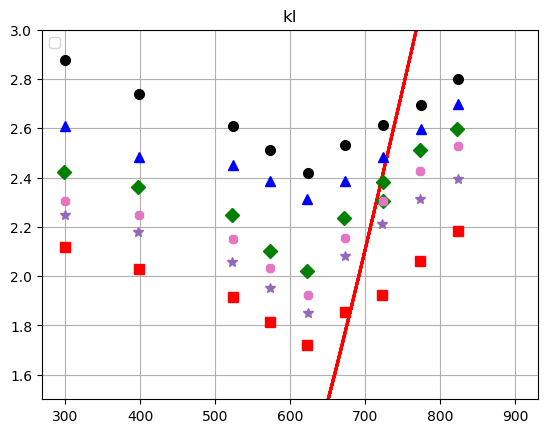

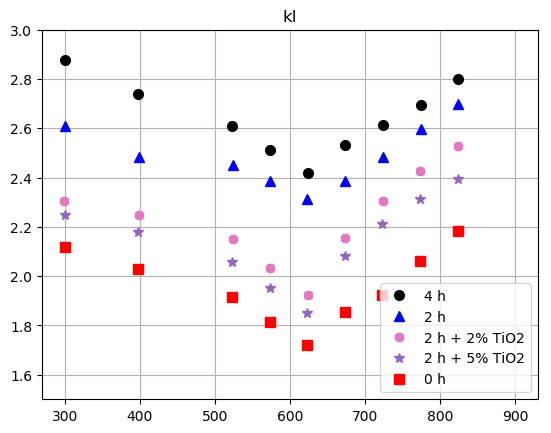

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3291: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
No handles with labels found to put in legend.


In [27]:
figure()
title("kl")
plot(Ts,36*klt_SA_A .+kes[:,1,1] .+0.6*kbis[:,1,1],Linestyle="-",color="k")
plot(Ts,34*klt_SA_A .+kes[:,1,1]+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
plot(Ts,28*klt_SA_A .+1.48kes[:,1,1] .+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27*klt_SA_A .+1.5kes[:,1,1] .+0.53*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26*klt_SA_A /+1.3kes[:,1,1] .+0.52*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
ylim(1.5,3.0)
grid()


figure()
title("kl")
plot(Ts,36 .*klt_SA_A .+kes[:,1,1] .+0.6 .*kbis[:,1,1],Linestyle="-",color="k",label="")
plot(Ts,34 .*klt_SA_A .+kes[:,1,1] .+0.567 .*kbis[:,1,1],Linestyle="-",color="b")
#plot(Ts,28*klt_SA_A+1.48kes[:,1,1]+0.57*kbis[:,1,1],Linestyle="-",color="g")
plot(Ts,29 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:pink")
plot(Ts,27 .*klt_SA_A .+1.5kes[:,1,1] .+0.53 .*kbis[:,1,1],Linestyle="-.",color="tab:purple")
plot(Ts,26 .*klt_SA_A .+1.3kes[:,1,1] .+0.52 .*kbis[:,1,1],Linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k",label="4 h")
plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b",label="2 h")
#plot(MgSiSn05hKCT+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
plot(MgSiSn2h2TiO2KCT .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink",label="2 h + 2% TiO2")
plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple",label="2 h + 5% TiO2")
plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="0 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")

ylim(1.5,3.0)
legend(loc="lower right")
grid()


In [28]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

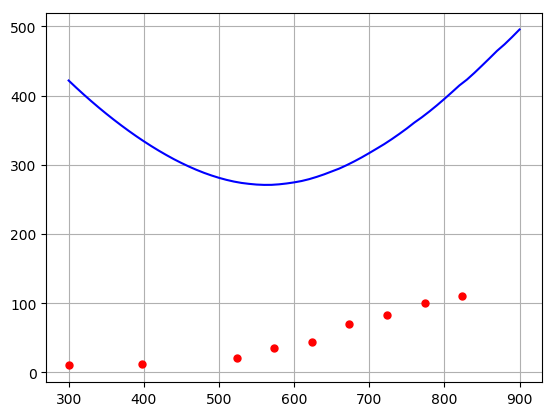

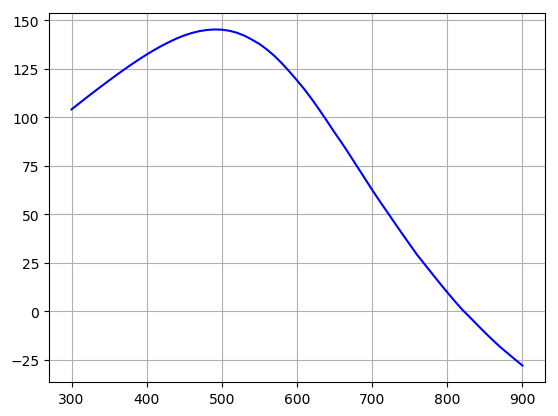

In [29]:

figure()
plot(Ts,sigmas[:,1,1]/100/6^(2/3),linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()